In [1]:
import hamilton
from hamilton import driver

In [2]:
%load_ext hamilton.plugins.jupyter_magic

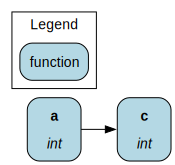

In [7]:
%%cell_to_module -m test_module --display 

from hamilton.function_modifiers import parameterize, source

def a() -> int:
    return 0

def b(s:int) -> int:
    return 2*s

parameterize(c={"s":source("a")})(b)

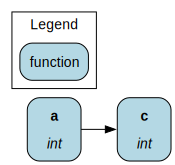

In [9]:
driver.Builder().with_modules(test_module).build()

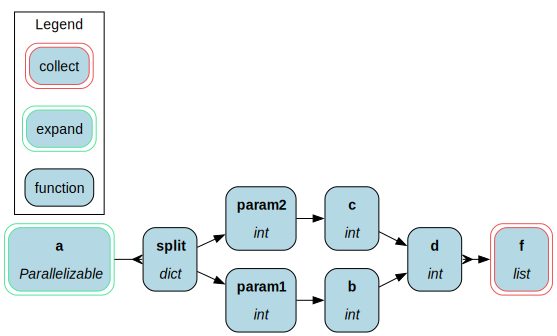

In [7]:
%%cell_to_module -m test_module --display 

from hamilton.function_modifiers import parameterize, source, extract_fields

from hamilton.htypes import Parallelizable, Collect


def a() -> Parallelizable[dict]:
    return {"param1":1, "param2":2}

@extract_fields(fields={"param1":int, "param2":int})
def split(a:dict) -> dict:
    return a

def b(param1:int) -> int:
    return 2*param1

def c(param2:int) -> int:
    return 3*param2

def d(b:int, c:int) -> int:
    return b+c

def f(d:Collect[int]) -> list[int]:
    return list(d)
